In [1]:
import wandb
api = wandb.Api()
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib gtk3

## This notebook deals with HIRO in a dense reward reaching task
$r = -\left\lVert ee - b \right\rVert_{2}$

Box is non-interactive and randomly spawns in reachable radius around agent on the table.

Episode length: 300 s

In [2]:
def get_df_selection(df, key, cond):
    '''Take only elements from the DataFrame where the *key* matches *cond*:bool'''
    elems = []
    for i in range(df.shape[0]):
        try:
            if df['config'][i][key] == cond:
                elems.append(df.loc[i, :])
        except:
            elems.append(df.loc[i, :])
    print(len(elems))
    return pd.DataFrame.from_records(elems)
    
def cumulative_reward(x, verbose=False):
    '''Plots R(n) where R(n) is the same of the graph from 0 to n. Essentially 
    a simple discrete integration.'''
    if verbose:
        print(f"Run length: {len(x)}")
    # Basically ignore faulty runs
    if len(x) == 0:
        return np.zeros(shape=[0,])
    ret = np.zeros([len(x),])
    ret[0] = 0
    for i in range(1, len(x)):
        ret[i] = ret[i-1] + x[i]
    return ret

def plotter(df, keys, f=None):
    '''Basic plotting utility that can apply a function on the data.'''
    f = [f if f else lambda x: x][0]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    for ax_idx, ax in enumerate(axes.flatten()):
        for i in range(df.shape[0]):
            data = df[keys[ax_idx]][i]
            steps = df['_step'][i]
            steps = np.linspace(0, steps[-1], len(data))
            ax.plot(steps, f(data))
            ax.set(title=keys[ax_idx], xlabel='steps')#, xlim=[0,1.4e6])
    plt.legend([x for x in df['name']], loc='lower left')
    
def plot_saver(df, key, f=None):
    '''Basic plotting utility that can apply a function on the data.'''        
    ylab = ['Success Rate' if not f else 'Cumulative Success Rate'][0]
    name = ['success_rate.eps' if not f else 'cumul_success_rate.eps'][0]
    f = [f if f else lambda x: x][0]
    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(4)
    for i in range(1, df.shape[0]):
        data = df[key][i]
        steps = df['_step'][i]
        steps = np.linspace(0, steps[-1], len(data))
        ax.plot(steps, f(data), linewidth=2)
        ax.set(title=key, xlabel='steps', ylabel=ylab, xlim=[0,1.4e6])
    fig.savefig(name)

        #plt.legend([x for x in df['name']], loc='lower left')    

5
5
10
5
5
5
5
5
5
5
10
5
5
5
5
5


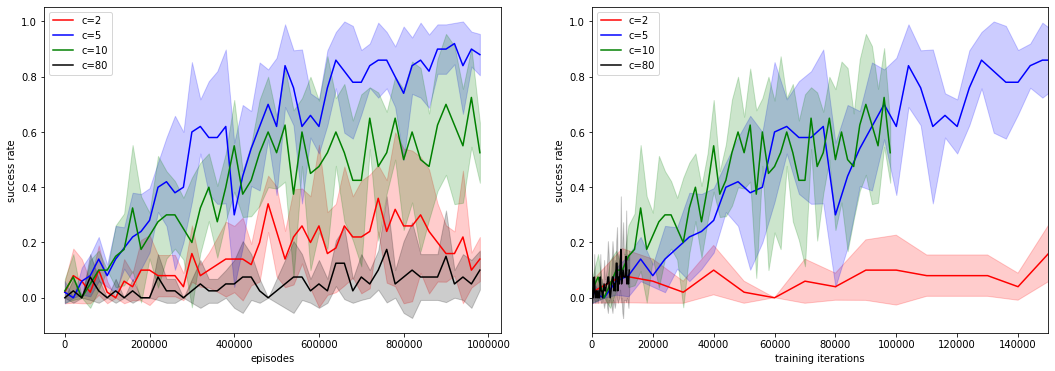

In [3]:
key = 'eval/success_rate'
length = 50

plt.figure(figsize=(18,6))
plt.subplot(122)
for c, color in zip([2, 5, 10, 80], ['r', 'b', 'g', 'k']):
    df = pd.read_pickle('dense_reaching_hiro.pyc')
    df = get_df_selection(df, 'c_step', c)
    df = get_df_selection(df, 'agent_action_regularizer', 0.)
    results = np.zeros(shape=[1, length])
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        if run.shape[1] >= length:
            results = np.concatenate([results, run[:, :length]], axis=0)
    mean = np.mean(results[1:], axis = 0)
    std = np.std(results[1:], axis=0)
    x_range = np.arange(0, length) * 20000 /c
    plt.plot(x_range, mean, color=color)
    plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
           color=color, alpha=0.2)

    
plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.xlim([0, 150000])
plt.legend(['c=2', 'c=5', 'c=10', 'c=80'])


plt.subplot(121)
for c, color in zip([2, 5, 10, 80], ['r', 'b', 'g', 'k']):
    df = pd.read_pickle('dense_reaching_hiro.pyc')
    df = get_df_selection(df, 'c_step', c)
    df = get_df_selection(df, 'agent_action_regularizer', 0.)
    results = np.zeros(shape=[1, length])
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        if run.shape[1] >= length:
            results = np.concatenate([results, run[:, :length]], axis=0) 
    mean = np.mean(results[1:], axis = 0)
    std = np.std(results[1:], axis=0)
    x_range = np.arange(0, length) * 20000 
    plt.plot(x_range, mean, color=color)
    plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
           color=color, alpha=0.2)

    
plt.xlabel('episodes')
plt.ylabel('success rate')
plt.legend(['c=2', 'c=5', 'c=10', 'c=80'])
#plt.savefig('hiro_vs_flat.pdf')

15
5
15
5
15
5
5
5
10
5
5
5
5
5


Text(0.5, 1.0, 'Time averaged successrate vs c')

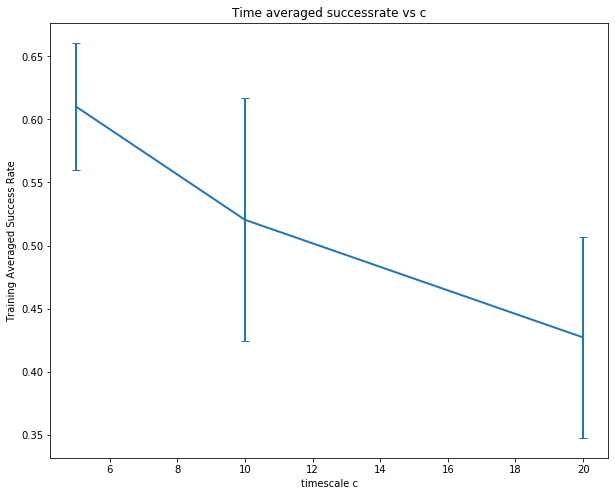

In [4]:

key = 'eval/success_rate'

plt.figure(figsize=(10, 8))
length = 50

if True:
    result_mean = []
    result_std = []
    for c, color in zip([5, 10, 20], ['b', 'r', 'g', 'k']):
        df = pd.read_pickle('hiro_offpol_corr.pyc')
        df = get_df_selection(df, 'agent_action_regularizer', 0.0)
        df_current = get_df_selection(df, 'c_step', c)
        meaner = np.zeros([1, 5])
        for i in range(5):
            run = df_current.iloc[i].loc[key]
            run = np.reshape(run, [1, run.shape[0]])
            run_mean = np.mean(run[:, :length], axis=1)
            meaner[0, i] = run_mean
        stder = np.std(meaner)
        meaner = np.mean(meaner)
        result_mean.append(meaner)
        result_std.append(stder)
    x_range = [5, 10, 20]
    plt.errorbar(x_range, result_mean, result_std, capsize=4, linewidth=2)

result_mean = []
result_std = []
for c, color in zip([2, 5, 10, 80], ['b', 'r', 'g', 'k','y']):
    df = pd.read_pickle('dense_reaching_hiro.pyc')
    df = get_df_selection(df, 'c_step', c)
    df = get_df_selection(df, 'agent_action_regularizer', 0.)
    meaner = np.zeros([1, 5])
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        run_mean = np.mean(run[:, :length], axis=1)
        meaner[0, i] = run_mean
    stder = np.std(meaner)
    meaner = np.mean(meaner)

    result_mean.append(meaner)
    result_std.append(stder)
x_range = [2, 5, 10, 80]
#plt.errorbar(x_range, result_mean, result_std, capsize=4, linewidth=2)

plt.xlabel('timescale c')
plt.ylabel('Training Averaged Success Rate')
#plt.legend(['Offpolicy Correction: True', 'Offpolicy Correction False'])
plt.title('Time averaged successrate vs c')
#plt.savefig('timescale_plot.pdf')

## There is a c=20 point which we do not show. need more data overall
Trained over 1e6 environment interactions

ac = 0

c variable

offpol true for first one, false for second

no_candidates 20

Training averaged success rate:

$\displaystyle \underset{E\sim\rho}{\mathbb{E}}\left[\frac{1}{K} \sum_{k=1}^{K}\sum_{t=1}^{T} r(\tau_{k}) \right] \approx \frac{1}{NK}\sum_{n=1}^{N} \sum_{k=1}^{K}\sum_{\tau} r(\tau_{nk}),$

where N is the number of sample episodes, K the number of episodes interacted with the environment (effectively averaged over the training procedure), T the number of timesteps in one episode and $\tau$ a trajectory ($(s_{t}, a_{t})$)



5
5
5
5
5
5
10
5
5
5
5
5


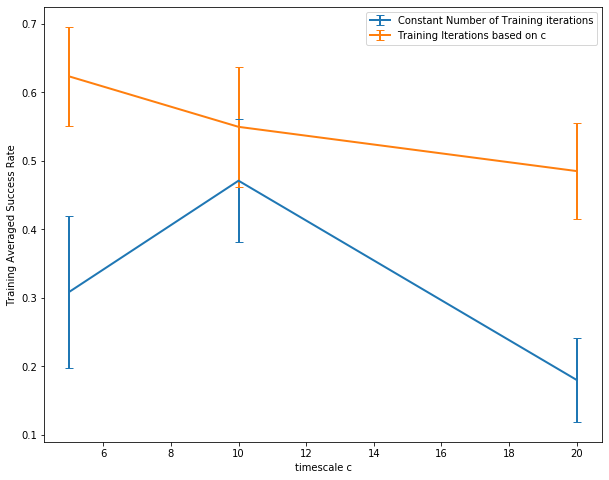

In [10]:
key = 'eval/success_rate'

plt.figure(figsize=(10, 8))
length = int(360/20)

result_mean = []
result_std = []
for c, color in zip([5, 10, 20], ['b', 'r', 'g', 'k','y']):
    df = pd.read_pickle('constant_train_its.pyc')
    df = get_df_selection(df, 'c_step', c)
    df = get_df_selection(df, 'agent_action_regularizer', 0.)
    meaner = np.zeros([1, 5])
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        run_mean = np.mean(run[:, :length], axis=1)
        meaner[0, i] = run_mean
    stder = np.std(meaner)
    meaner = np.mean(meaner)

    result_mean.append(meaner)
    result_std.append(stder)
x_range = [5, 10, 20]
plt.errorbar(x_range, result_mean, result_std, capsize=4, linewidth=2)

length = 75
result_mean = []
result_std = []
for c, color in zip([5, 10, 20], ['b', 'r', 'g', 'k','y']):
    df = pd.read_pickle('hiro_offpol_corr.pyc')
    df = get_df_selection(df, 'c_step', c)
    df = get_df_selection(df, 'agent_action_regularizer', 0.)
    meaner = np.zeros([1, 5])
    for i in range(5):
        run = df.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        run_mean = np.mean(run[:, :length], axis=1)
        meaner[0, i] = run_mean
    stder = np.std(meaner)
    meaner = np.mean(meaner)

    result_mean.append(meaner)
    result_std.append(stder)
x_range = [5, 10, 20]
plt.errorbar(x_range, result_mean, result_std, capsize=4, linewidth=2)


plt.xlabel('timescale c')
plt.ylabel('Training Averaged Success Rate')
plt.legend(['Constant Number of Training iterations', 'Training Iterations based on c'])
#plt.savefig('timescale_plot.pdf')

10
5
5
5
5
5
5
5


Text(0, 0.5, 'Training Averaged Success Rate')

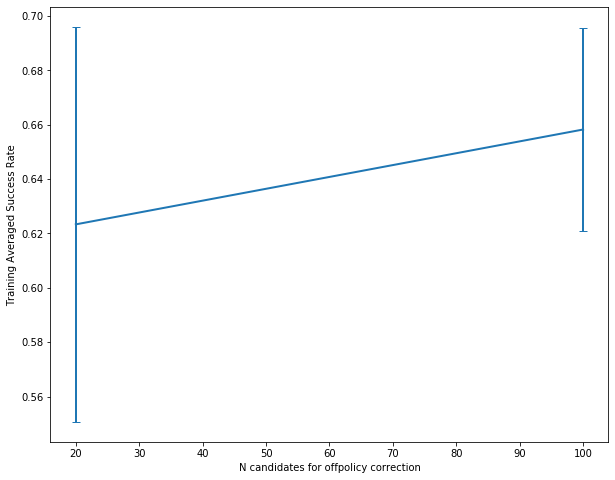

In [6]:
key = 'eval/success_rate'
plt.figure(figsize=(10, 8))
length = 39

result_mean = []
result_std = []

df = pd.read_pickle('hiro_offpol_corr.pyc')
df = get_df_selection(df, 'c_step', 5)
df = get_df_selection(df, 'agent_action_regularizer', 0)
df = get_df_selection(df, 'offpolicy', 1)
df = get_df_selection(df, 'no_candidates', 20)

meaner = np.zeros([1, 5])
for i in range(5):
    run = df.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    run_mean = np.mean(run, axis=1)
    meaner[0, i] = run_mean
stder = np.std(meaner)
meaner = np.mean(meaner)
result_mean.append(meaner)
result_std.append(stder)

df = pd.read_pickle('errorplots.pyc')
df = get_df_selection(df, 'c_step', 5)
df = get_df_selection(df, 'agent_action_regularizer', 0)
df = get_df_selection(df, 'offpolicy', 1)
df = get_df_selection(df, 'no_candidates', 100)

meaner = np.zeros([1, 5])
for i in range(5):
    run = df.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    run_mean = np.mean(run, axis=1)
    meaner[0, i] = run_mean
stder = np.std(meaner)
meaner = np.mean(meaner)
result_mean.append(meaner)
result_std.append(stder)
x_range = [20, 100]
plt.errorbar(x_range, result_mean, result_std, capsize=4, linewidth=2)
plt.xlabel('N candidates for offpolicy correction')
plt.ylabel('Training Averaged Success Rate')

5
5
5
10
5
5


Text(0.5, 1.0, 'Offpolicy Correction True vs False')

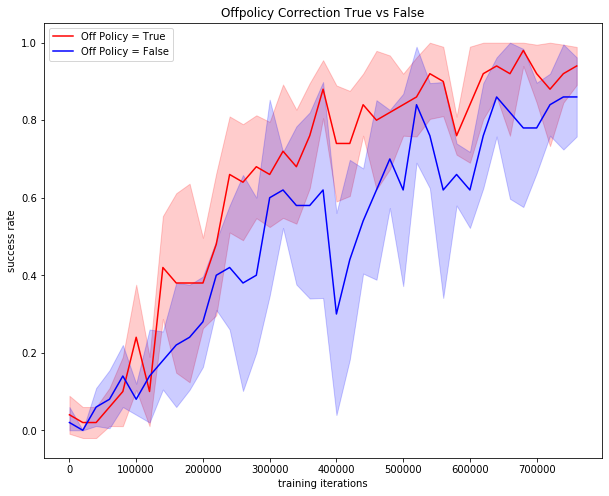

In [7]:
key = 'eval/success_rate'
plt.figure(figsize=(10, 8))
length = 39
df = pd.read_pickle('errorplots.pyc')
df_current = get_df_selection(df, 'c_step', 5)
df_current = get_df_selection(df_current, 'agent_action_regularizer', 0)
df_current = get_df_selection(df_current, 'offpolicy', 1)
results = np.zeros(shape=[1, length])
for i in range(5):
    run = df_current.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    if run.shape[1] >= length:
        results = np.concatenate([results, run[:, :length]], axis=0) 
    else:
        print(f'Element {i} lost')
mean = np.mean(results[1:], axis = 0)
std = np.std(results[1:], axis=0)
x_range = np.arange(0, length) * 20000
plt.plot(x_range, mean, color='r')
plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
       color='r', alpha=0.2)

df = pd.read_pickle('dense_reaching_hiro.pyc')
df_current = get_df_selection(df, 'c_step', 5)
df_current = get_df_selection(df_current, 'agent_action_regularizer', 0)
df_current = get_df_selection(df_current, 'offpolicy', 0)
results = np.zeros(shape=[1, length])
for i in range(5):
    run = df_current.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    if run.shape[1] >= length:
        results = np.concatenate([results, run[:, :length]], axis=0) 
    else:
        print(f'Element {i} lost')
mean = np.mean(results[1:], axis = 0)
std = np.std(results[1:], axis=0)
x_range = np.arange(0, length) * 20000
plt.plot(x_range, mean, color='b')
plt.fill_between(x_range, np.maximum(mean - std, 0), np.minimum(mean + std, 1.0),
       color='b', alpha=0.2)

plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.legend(['Off Policy = True', 'Off Policy = False'])
plt.title('Offpolicy Correction True vs False')
#plt.savefig('offpol_plot.pdf')


6


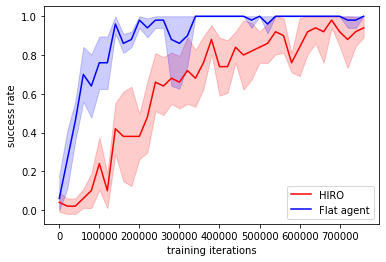

In [8]:
key = 'eval/success_rate'
length = 39

results = np.zeros(shape=[1, length])
df = pd.read_pickle('errorplots.pyc')
for i in range(5):
    run = df.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    if run.shape[1] >= length:
        results = np.concatenate([results, run[:, :length]], axis=0)
    else:
        print(f'Element {i} lost')
mean = np.mean(results[1:], axis = 0)
std = np.std(results[1:], axis=0)
x_range = np.arange(0, length) * 20000
plt.plot(x_range, mean, color='r')
plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
       color='r', alpha=0.2)
    
df = pd.read_pickle('dense_reaching_hiro.pyc')
df = get_df_selection(df, 'flat_agent', 1)
results = np.zeros(shape=[1, length])
for i in range(5):
    run = df.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    if run.shape[1] >= length:
        results = np.concatenate([results, run[:, :length]], axis=0) 
    else:
        print(f'Element {i} lost')
        
mean = np.mean(results[1:], axis = 0)
std = np.std(results[1:], axis=0)
x_range = np.arange(0, length) * 20000
plt.plot(x_range, mean, color='b')
plt.fill_between(x_range, np.maximum(mean - std, 0), np.minimum(mean + std, 1.0),
       color='b', alpha=0.2)
    
plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.legend(['HIRO', 'Flat agent'])
plt.savefig('hiro_vs_flat.pdf')


10
5
10
5


Text(0.5, 1.0, 'Without offpolicy correction')

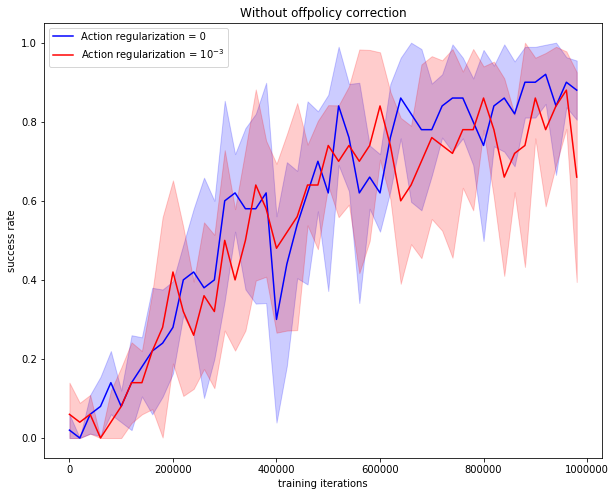

In [197]:
'''without offpol corr'''
key = 'eval/success_rate'
plt.figure(figsize=(10, 8))

length = 50
for ac, color in zip([0, 0.001], ['b', 'r', 'g', 'k']):
    df = pd.read_pickle('dense_reaching_hiro.pyc')
    df_current = get_df_selection(df, 'c_step', 5)
    df_current = get_df_selection(df_current, 'agent_action_regularizer', ac)
    results = np.zeros(shape=[1, length])
    for i in range(5):
        run = df_current.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        if run.shape[1] >= length:
            results = np.concatenate([results, run[:, :length]], axis=0) 
        else:
            print(f'Element {i} lost')
        
    mean = np.mean(results[1:], axis = 0)
    std = np.std(results[1:], axis=0)
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color=color)
    plt.fill_between(x_range, np.maximum(mean - std, 0), np.minimum(mean + std, 1.0),
           color=color, alpha=0.2)
plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.legend(['Action regularization = 0', 'Action regularization = $10^{-3}$'], loc='upper left')
plt.title('Without offpolicy correction')
#plt.savefig('action_regul.pdf')

10
5
10
5


Text(0.5, 1.0, 'With offpolicy correction')

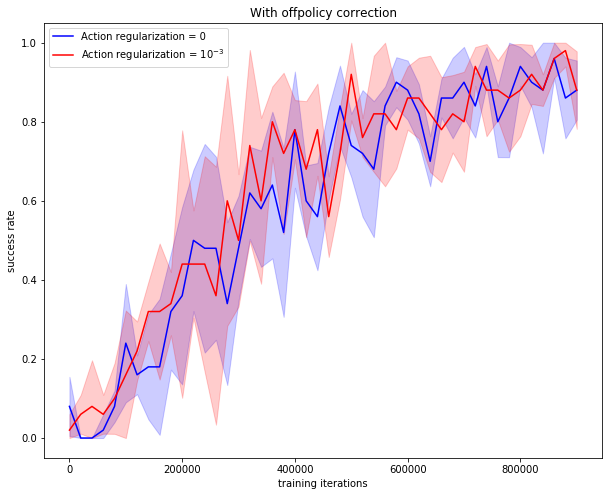

In [195]:
'''With offpol corr'''
key = 'eval/success_rate'
plt.figure(figsize=(10, 8))

length = 46
for ac, color in zip([0, 0.001], ['b', 'r', 'g', 'k']):
    df = pd.read_pickle('hiro_offpol_corr.pyc')
    df_current = get_df_selection(df, 'c_step', 5)
    df_current = get_df_selection(df_current, 'agent_action_regularizer', ac)
    results = np.zeros(shape=[1, length])
    for i in range(5):
        run = df_current.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        if run.shape[1] >= length:
            results = np.concatenate([results, run[:, :length]], axis=0) 
        else:
            print(f'Element {i} lost')
        
    mean = np.mean(results[1:], axis = 0)
    std = np.std(results[1:], axis=0)
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color=color)
    plt.fill_between(x_range, np.maximum(mean - std, 0), np.minimum(mean + std, 1.0),
           color=color, alpha=0.2)
plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.legend(['Action regularization = 0', 'Action regularization = $10^{-3}$'])
plt.title('With offpolicy correction')
#plt.savefig('action_regul.pdf')